In [199]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('./insurance.csv')
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


### Analysing given data

#### Data composition

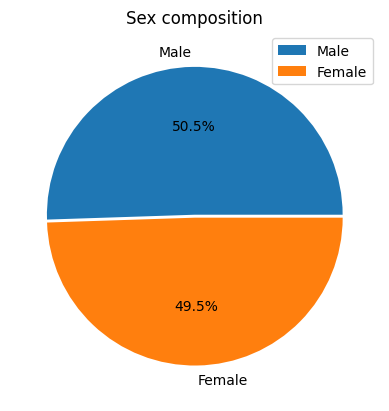

In [3]:
female=df.loc[df['sex']=='female'].count()[0]
male=df.loc[df['sex']=='male'].count()[0]
pieData=[male,female]
plt.pie(pieData,autopct='%1.1f%%',labels=['Male','Female'],explode=[0.01,0.01])
plt.title('Sex composition')
plt.legend()
plt.show()

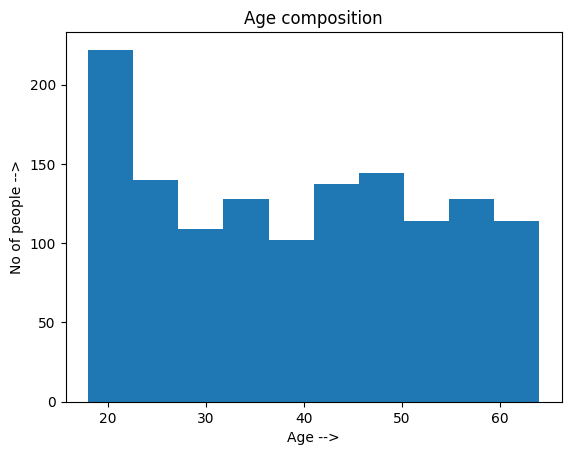

In [4]:
plt.hist(df['age'])
plt.xlabel('Age -->')
plt.ylabel('No of people -->')
plt.title('Age composition')
plt.show()

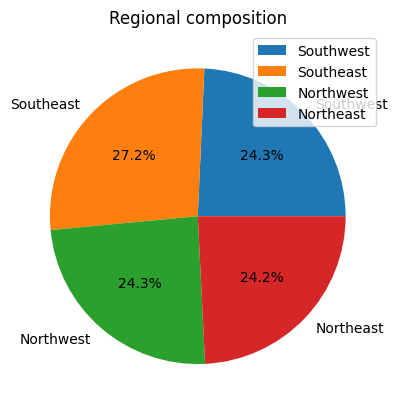

In [5]:
sw = df[df['region']=='southwest'].count()[0]
se = df[df['region']=='southeast'].count()[0]
nw = df[df['region']=='northwest'].count()[0]
ne = df[df['region']=='northeast'].count()[0]
regionData=[sw,se,nw,ne]
regionLabel=['Southwest','Southeast','Northwest','Northeast']
plt.pie(regionData,autopct="%1.1f%%",labels=regionLabel)
plt.legend()
plt.title('Regional composition')
plt.show()

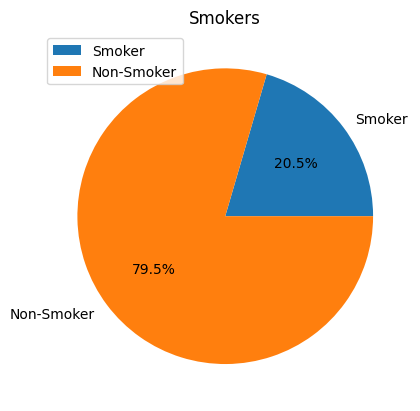

In [6]:
smokers=df[df['smoker']=='yes'].count()[0]
nonSmokers=df[df['smoker']=='no'].count()[0]
plt.pie([smokers,nonSmokers],autopct='%1.1f%%',labels=['Smoker','Non-Smoker'])
plt.legend()
plt.title('Smokers')
plt.show()

In [98]:
df['smoker'] = (df['smoker']=='yes').astype(int)
df['smoker']


0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int32

In [7]:
df.sample

<bound method NDFrame.sample of       index  age     sex     bmi  children smoker     region      charges
0         0   19  female  27.900         0    yes  southwest  16884.92400
1         1   18    male  33.770         1     no  southeast   1725.55230
2         2   28    male  33.000         3     no  southeast   4449.46200
3         3   33    male  22.705         0     no  northwest  21984.47061
4         4   32    male  28.880         0     no  northwest   3866.85520
...     ...  ...     ...     ...       ...    ...        ...          ...
1333   1333   50    male  30.970         3     no  northwest  10600.54830
1334   1334   18  female  31.920         0     no  northeast   2205.98080
1335   1335   18  female  36.850         0     no  southeast   1629.83350
1336   1336   21  female  25.800         0     no  southwest   2007.94500
1337   1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 8 columns]>

In [20]:
df['bmi'].mean(),df['bmi'].mode(), df['charges'].mean(), df['age'].mean(),df['age'].mode()

(30.66339686098655,
 0    32.3
 Name: bmi, dtype: float64,
 13270.422265141257,
 39.20702541106129,
 0    18
 Name: age, dtype: int64)

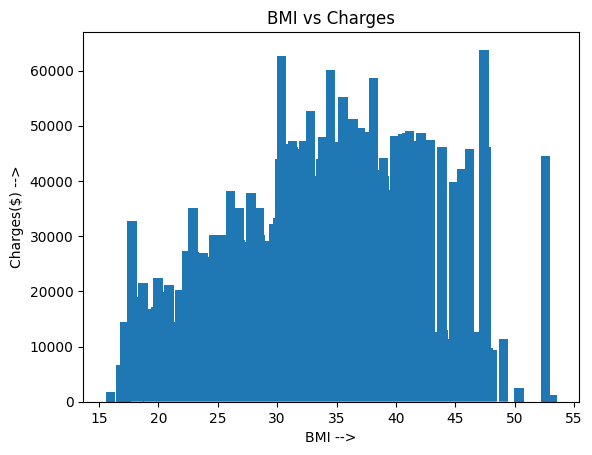

In [28]:
plt.bar(df['bmi'],df['charges'])
plt.xlabel('BMI -->')
plt.ylabel('Charges($) -->')
plt.title('BMI vs Charges')
plt.show()

In [87]:
smokerFrame=df[df['smoker']=='yes']
nonSmokerFrame=df[df['smoker']=='no']
diff=((smokerFrame['charges'].mean()-df['charges'].mean())/df['charges'].mean())
print("Difference between smoker charges and average: {:.2f}%".format(diff*100))
diff2=((smokerFrame['charges'].mean()-nonSmokerFrame['charges'].mean())/smokerFrame['charges'].mean())
print(("Difference between smoker charges and non-smoker charges: {:.2f}%".format(diff2*100)))

Difference between smoker charges and average: 141.52%
Difference between smoker charges and non-smoker charges: 73.68%


In [104]:
female=df[df['sex']=='female']
male=df[df['sex']=='male']
mf=(male['charges'].mean()-female['charges'].mean())/male['charges'].mean()*100
print("Difference in average charges between female and male customers: {:.2f}%".format(mf))

Difference in average charges between female and male customers: 9.94%


In [214]:
southWestMean=df[df['region']=='southwest']['charges'].mean()
southEastMean=df[df['region']=='southeast']['charges'].mean()
northWestMean=df[df['region']=='northwest']['charges'].mean()
northEastMean=df[df['region']=='northeast']['charges'].mean()

charges={southWestMean:'Southwest',southEastMean:'Southeast',northWestMean:'Northwest',northEastMean:'Northeast'}

charge_list=charges.keys()

charge_max=max(charges.keys())

highestRegion=max(charge_list)  

print("Region with the highest average fees: ",charges.get(highestRegion),
      "\nSoutheast average: {:.2f}".format(charge_max),
      "\nNortheast average: {:.2f}".format(northEastMean),
      "\nNorthwest average: {:.2f}".format(northWestMean),
      "\nSouthwest average: {:.2f}".format(southWestMean),
      )

Region with the highest average fees:  Southeast 
Southeast average: 14735.41 
Northeast average: 13406.38 
Northwest average: 12417.58 
Southwest average: 12346.94


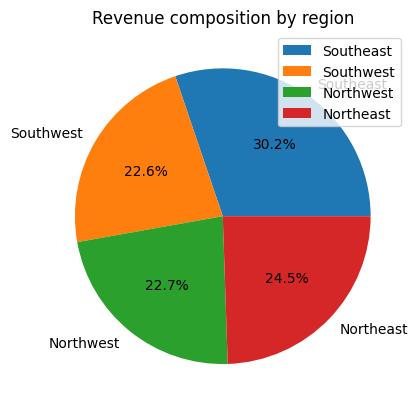

In [253]:
SE_Pie=df[df['region']=='southeast']['charges'].sum()
SW_Pie=df[df['region']=='southwest']['charges'].sum()
NW_Pie=df[df['region']=='northwest']['charges'].sum()
NE_Pie=df[df['region']=='northeast']['charges'].sum()
region_pie=[SE_Pie,SW_Pie,NW_Pie,NE_Pie]
plt.pie(region_pie,autopct='%1.1f%%',labels=['Southeast','Southwest','Northwest','Northeast'])
plt.legend()
plt.title('Revenue composition by region')
plt.show()

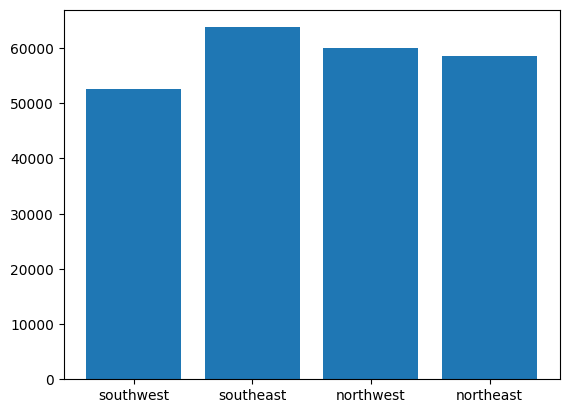

In [260]:
plt.bar(df['region'],df['charges'])
plt.show()